In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *


def display_categorical_features(df, thresh=10):
    """データを最初にここに通して質的変数の確認を行う"""
    unique_count = df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
    for idx in unique_count.index:
        if unique_count[idx] <= thresh:
            print(f"{idx}\t{unique_count[idx]}\t{df[idx].unique()}")
        else:
            print(f"{idx}\t{unique_count[idx]}")

In [2]:
df = pd.read_csv("train_remarks_not_drop.csv").drop(["dateid"], axis=1)
display_categorical_features(df)
# df, new_columns = one_hot_encoder(df)

week	5	['Tue' 'Wed' 'Thu' 'Fri' 'Mon']
name	212
remarks	6	[nan 'お楽しみメニュー' 'こだわりメニュー' '近隣に飲食店複合ビルオープン' 'イチオシ' 'コンビニ改装' '弁当種類増↓']
event	2	[nan 'ママの会' 'キャリアアップ支援セミナー']
weather	62


In [28]:
exp = setup(df, target="y", session_id=1121, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,1121
1,Target,y
2,Original Data,"(336, 26)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,22
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(235, 237)"


In [29]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,10.1503,200.1291,13.7246,0.4335,0.2132,0.1690,0.1590
ada,AdaBoost Regressor,11.0693,212.9091,14.2622,0.4314,0.2194,0.1828,0.0190
gbr,Gradient Boosting Regressor,10.4148,193.7581,13.6821,0.4187,0.2157,0.1778,0.0260
lasso,Lasso Regression,11.8800,237.0334,15.1932,0.3582,0.2372,0.2021,0.0060
et,Extra Trees Regressor,11.3099,252.4663,15.4333,0.3161,0.2364,0.1862,0.1580
xgboost,Extreme Gradient Boosting,10.9619,224.0035,14.6828,0.3130,0.2269,0.1876,0.0770
br,Bayesian Ridge,11.5459,235.6795,15.1786,0.3103,0.2373,0.1957,0.0120
ridge,Ridge Regression,11.4908,238.5700,15.2391,0.2993,0.2404,0.1958,0.0050
lightgbm,Light Gradient Boosting Machine,11.5400,234.5715,14.9846,0.2971,0.2368,0.1941,0.0150
omp,Orthogonal Matching Pursuit,11.6152,258.0868,15.7471,0.2623,0.2408,0.1891,0.0060


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1121, verbose=0, warm_start=False)

In [30]:
# model = create_model("rf")
# model = create_model("br")
# model = create_model("lasso")
# model = create_model("ridge")
model = create_model("gbr")
# model = create_model("xgboost")
# model = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.6105,103.8394,10.1902,0.2235,0.1961,0.1577
1,9.8549,159.5998,12.6333,-0.6416,0.1968,0.1702
2,9.0838,154.3651,12.4244,0.6550,0.2678,0.2138
3,9.2713,114.4189,10.6967,0.8083,0.1649,0.1533
4,13.1439,363.4308,19.0639,0.3627,0.2525,0.1782
5,12.0627,235.9456,15.3605,0.4996,0.2151,0.1852
6,9.4388,210.3028,14.5018,0.5437,0.2505,0.1869
7,10.7437,176.7595,13.2951,0.5036,0.2048,0.1805
8,12.5857,268.0623,16.3726,0.4609,0.2209,0.1923


In [31]:
print(model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1121, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [32]:
tuned_model = tune_model(model, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.8304,101.9592,10.0975,0.2375,0.1897,0.1595
1,9.0486,140.5476,11.8553,-0.4456,0.1890,0.1587
2,8.3599,122.0120,11.0459,0.7273,0.2372,0.1903
3,10.1550,156.5313,12.5112,0.7377,0.1805,0.1535
4,13.0578,378.3339,19.4508,0.3366,0.2684,0.1797
5,10.9574,229.6622,15.1546,0.5129,0.2008,0.1570
6,7.3748,95.6168,9.7784,0.7925,0.1786,0.1350
7,11.1748,207.4140,14.4019,0.4175,0.2247,0.1849
8,13.3816,281.7765,16.7862,0.4333,0.2473,0.2186


In [33]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,13.0780,291.0583,17.0604,0.2213,0.2596,0.2137


,kcal,precipitation,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed,soldout_1,name_いか天ぷら,...,main_薄曇_not_available,sub_曇_not_available,sub_ひょう_1.0,sub_雷_not_available,sub_晴_not_available,sub_雨_1.0,sub_みぞれ_1.0,sub_薄曇_1.0,y,Label
0,450.000000,9.0,15.900000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,64.0,67.565837
1,433.000000,2.5,22.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,58.0,57.427565
2,420.000000,0.0,23.799999,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,58.0,59.612488
3,420.000000,3.5,16.400000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,37.0,51.474589
4,425.000000,0.0,15.800000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,56.0,66.273963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,418.398102,0.0,27.799999,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,75.0,109.132003
97,430.000000,123.5,19.900000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,93.0,47.720439
98,436.000000,0.0,6.200000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,70.0,54.621756
99,418.000000,3.0,14.100000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,57.0,65.958356


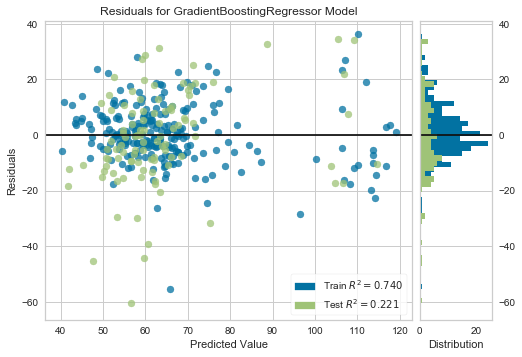

In [34]:
plot_model(tuned_model)

In [35]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
final_model = finalize_model(tuned_model)

In [37]:
df_pred = pd.read_csv("test_remarks_not_drop.csv")
df_dateid = df_pred["dateid"]
df_pred = df_pred.drop(["dateid"], axis=1)
df_pred = predict_model(final_model, data=df_pred)
df_submit = pd.concat([df_dateid, df_pred["Label"]], axis=1)
df_submit.columns = ["dateid", "y"]
df_submit.to_csv("submit.csv", index=False, header=False)